In [2]:
!! pip3 install tensorflow

['Collecting tensorflow',
 '  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/d6/69/d461fa09235326e08b7ca463d5491426fdd4908ef6d3f9ed51d0777dc071/tensorflow-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata',
 '  Downloading tensorflow-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (2.6 kB)',
 'Collecting tensorflow-macos==2.13.0 (from tensorflow)',
 '  Obtaining dependency information for tensorflow-macos==2.13.0 from https://files.pythonhosted.org/packages/f1/cc/6c262ae6f3a23b118b1104fa5f6126067744ffa9226faade202b0a20bdd3/tensorflow_macos-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata',
 '  Downloading tensorflow_macos-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.2 kB)',
 'Collecting absl-py>=1.0.0 (from tensorflow-macos==2.13.0->tensorflow)',
 '  Downloading absl_py-1.4.0-py3-none-any.whl (126 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/126.5 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K 

In [4]:
!! pip3 install tensorflow_hub

['Collecting tensorflow_hub',
 '  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/30/78/9d5292a2b616901bdb075bbf0c777b293f4140bb48108ac2b33fd716c2eb/tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata',
 '  Downloading tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata (1.4 kB)',
 'Requirement already satisfied: numpy>=1.12.0 in /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages (from tensorflow_hub) (1.24.3)',
 'Requirement already satisfied: protobuf>=3.19.6 in /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages (from tensorflow_hub) (4.24.2)',
 'Downloading tensorflow_hub-0.14.0-py2.py3-none-any.whl (90 kB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/90.3 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b90.3/90.3 kB\x1b \x1b6.3 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hInstalling collected packa

In [2]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"


In [64]:
# Declaring Constants
IMAGE_PATH = "./data/original.png"
SAVED_MODEL_PATH = "./model/esrgan-tf2_1"


In [3]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [4]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [60]:
hr_image = preprocess_image(IMAGE_PATH)

Saved as ./data/Original Image.jpg


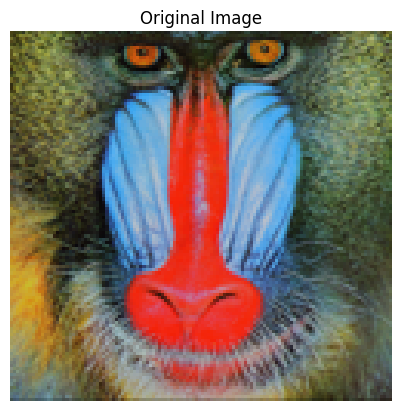

In [62]:
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="./data/Original Image")

In [5]:

model = tf.saved_model.load(SAVED_MODEL_PATH)

In [66]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 0.924637


Saved as ./data/Super Resolution.jpg


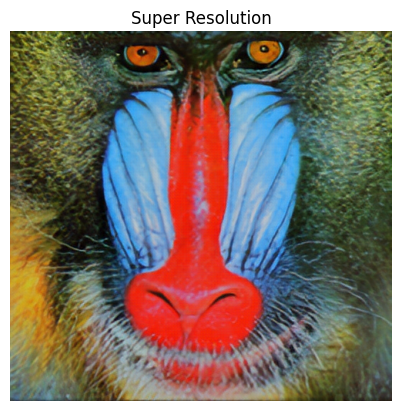

In [70]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="./data/Super Resolution")

In [12]:
# Declaring Constants
IMAGE_PATH = "./data/example3.png"
SAVED_MODEL_PATH = "./model/esrgan-tf2_1"
hr_image = preprocess_image(IMAGE_PATH)

Saved as ./data/Example3 Original Image.jpg


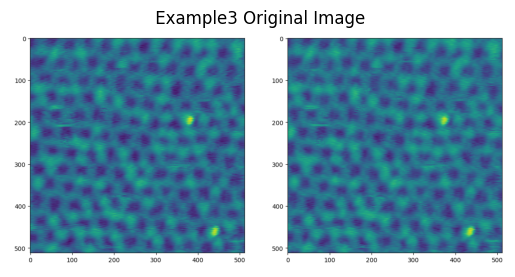

In [13]:
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image), title=" Example3 Original Image")
save_image(tf.squeeze(hr_image), filename="./data/Example3 Original Image")

In [14]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 21.660775


Saved as ./data/Example3 Super Resolution.jpg


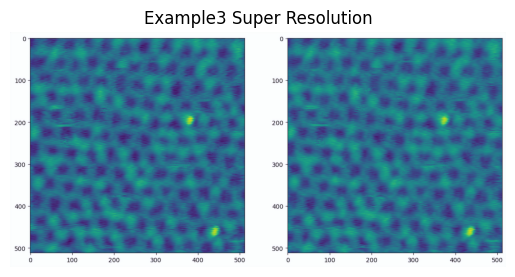

In [15]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Example3 Super Resolution")
save_image(tf.squeeze(fake_image), filename="./data/Example3 Super Resolution")

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the pre-trained ESRGAN model from TensorFlow Hub
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
esrgan_model = hub.load(SAVED_MODEL_PATH)

# Create a new classification layer for your specific task
# Replace 'num_classes' with the number of classes in your dataset
num_classes = 10
classification_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

# Combine the ESRGAN base model with the new classification layer
model = tf.keras.Sequential([
    esrgan_model,             # Pre-trained ESRGAN model
    classification_layer      # New classification layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on your own dataset (replace train_dataset and val_dataset)
model.fit(train_dataset, epochs=5, validation_data=val_dataset)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")